# Titanic architectural photos

![Example Image](./tita.jpg)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [94]:
df=pd.read_csv('C:/Users/Moussa/Desktop/Titanic/Titanic/train.csv')
test=pd.read_csv('C:/Users/Moussa/Desktop/Titanic/Titanic/test.csv')

## pre-processing

In [95]:
df.sample(6, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S


In [96]:
test.sample(6, random_state=42)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
30,922,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S


In [97]:
df.groupby('Sex').Survived.mean().to_frame()

,Survived
Sex,
female,0.742038
male,0.188908


In [98]:
df.groupby('Pclass').Survived.mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='Age'>

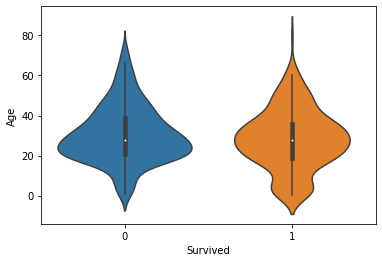

In [99]:
sns.violinplot(x='Survived', y='Age', data=df)

In [100]:
df[df.Parch > 0].Survived.mean()

0.5117370892018779

In [101]:
df[df.Parch == 0].Survived.mean()


0.34365781710914456

In [102]:
df[df.SibSp > 0].Survived.mean()

0.4664310954063604

In [103]:
df[df.SibSp == 0].Survived.mean()

0.34539473684210525

In [104]:
df.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [105]:
df['cabinletter'] = df.Cabin.apply(lambda x: x[0] if not pd.isna(x) else x)
df.groupby('cabinletter').Survived.agg(['count', 'mean'])

,count,mean
cabinletter,,
A,15,0.466667
B,47,0.744681
C,59,0.593220
D,33,0.757576
E,32,0.750000
F,13,0.615385
G,4,0.500000
T,1,0.000000


In [106]:
(df.Name.value_counts()==1).sum()

891

In [107]:
df["lastname"]=df.Name.apply(lambda x: x.split(',')[0])
t_df=df.groupby('lastname').Survived.agg(['count','mean']).sort_values('count',ascending=False)
t_df[(t_df['count']>1) & (t_df['count']<10)]

,count,mean
lastname,,
Andersson,9,0.222222
Sage,7,0.000000
Skoog,6,0.000000
Carter,6,0.666667
Goodwin,6,0.000000
...,...,...
Zabour,2,0.000000
White,2,0.000000
McCoy,2,1.000000


In [108]:
f_df=df.groupby('Ticket').Survived.agg(['count','mean']).sort_values('count',ascending=False)
f_df

,count,mean
Ticket,,
1601,7,0.714286
CA. 2343,7,0.000000
347082,7,0.000000
CA 2144,6,0.000000
347088,6,0.000000
...,...,...
345572,1,1.000000
345364,1,0.000000
343276,1,0.000000


In [109]:
df['TicketLetter'] = df.Ticket.apply(lambda x: x[0])
df.groupby('TicketLetter').Survived.agg(['count', 'mean'])

,count,mean
TicketLetter,,
1,146,0.630137
2,183,0.464481
3,301,0.239203
4,10,0.200000
5,3,0.000000
6,6,0.166667
7,9,0.111111
8,2,0.000000
9,1,1.000000


In [110]:
import re
def extract_ticket_prefix(ticket):
    if pd.isna(ticket):
        return ticket
    first_digit_search = re.search(r'\d', ticket)
    if first_digit_search:
        return ticket[:first_digit_search.span()[0]].strip()
    return None

In [111]:
df.sort_values('Ticket').Ticket.values[:100]

array(['110152', '110152', '110152', '110413', '110413', '110413',
       '110465', '110465', '110564', '110813', '111240', '111320',
       '111361', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113505',
       '113509', '113510', '113514', '113572', '113572', '113760',
       '113760', '113760', '113760', '113767', '113773', '113776',
       '113776', '113781', '113781', '113781', '113781', '113783',
       '113784', '113786', '113787', '113788', '113789', '113789',
       '113792', '113794', '113796', '113798', '113798', '113800',
       '113803', '113803', '113804', '113806', '113806', '113807',
       '11668', '11668', '11751', '11751', '11752', '11753', '11755',
       '11765', '11767', '11767', '11769', '11771', '11774', '11813',
       '11967', '11967', '12233', '12460', '12749', '127

In [112]:
df.sort_values('Ticket').Survived.values[:100]

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [113]:
df.sort_values('Ticket')[['Ticket','Survived']].values[:100]

array([['110152', 1],
       ['110152', 1],
       ['110152', 1],
       ['110413', 0],
       ['110413', 1],
       ['110413', 1],
       ['110465', 0],
       ['110465', 0],
       ['110564', 1],
       ['110813', 1],
       ['111240', 0],
       ['111320', 0],
       ['111361', 1],
       ['111361', 1],
       ['111369', 1],
       ['111426', 1],
       ['111427', 1],
       ['111428', 1],
       ['112050', 0],
       ['112052', 0],
       ['112053', 1],
       ['112058', 0],
       ['112059', 0],
       ['112277', 1],
       ['112379', 0],
       ['113028', 0],
       ['113043', 0],
       ['113050', 0],
       ['113051', 0],
       ['113055', 1],
       ['113056', 0],
       ['113059', 0],
       ['113501', 0],
       ['113503', 0],
       ['113505', 1],
       ['113505', 1],
       ['113509', 0],
       ['113510', 0],
       ['113514', 0],
       ['113572', 1],
       ['113572', 1],
       ['113760', 1],
       ['113760', 1],
       ['113760', 1],
       ['113760', 1],
       ['1





































































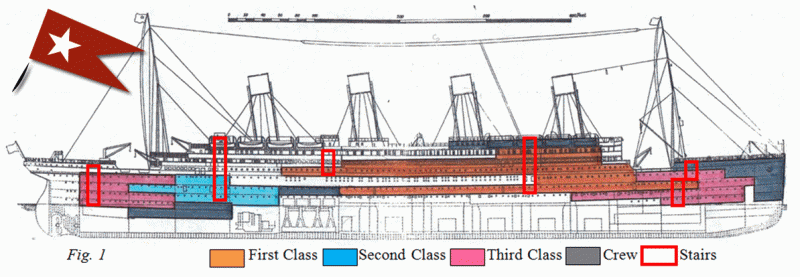




































<AxesSubplot:>

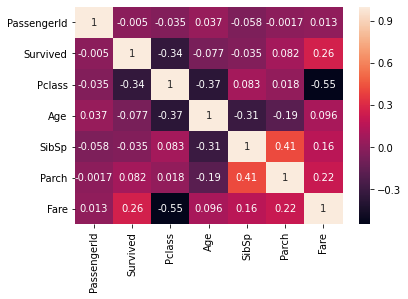

In [114]:
sns.heatmap(df.corr(), annot=True)

In [115]:
def preprocess_dataframe(df):
    df = df.copy()
    df['CabinLetter'] = df.Cabin.apply(lambda v : v if pd.isna(v) else v[0])
    df['FamilyId'] = df.Name.str.lower().str.split(', ').str[0] + df.CabinLetter + df.Embarked + df.Pclass.astype(str)
    df['TicketPrefix'] = df.Ticket.apply(extract_ticket_prefix)
    df['FirstName'] = df.Name.str.split(' ').apply(lambda vs : vs[1].lower())
    df['Pclass'] = df['Pclass'].astype(str)
    return df

## Train the Survival Prediction Model.

In [116]:
numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
num_df = df[numeric_features].copy()
num_df.loc[num_df['Age'].isnull(), 'Age'] = num_df.Age.mean()
num_df

,Age,Fare,Parch,SibSp
0,22.000000,7.2500,0,1
1,38.000000,71.2833,0,1
2,26.000000,7.9250,0,0
3,35.000000,53.1000,0,1
4,35.000000,8.0500,0,0
...,...,...,...,...
886,27.000000,13.0000,0,0
887,19.000000,30.0000,0,0
888,29.699118,23.4500,2,1
889,26.000000,30.0000,0,0


In [117]:
category_features=['Pclass','Sex','Embarked','cabinletter']
cat_df=df[category_features].copy()
cat_df

,Pclass,Sex,Embarked,cabinletter
0,3,male,S,NaN
1,1,female,C,C
2,3,female,S,NaN
3,1,female,S,C
4,3,male,S,NaN
...,...,...,...,...
886,2,male,S,NaN
887,1,female,S,B
888,3,female,S,NaN
889,1,male,C,C


In [118]:
onehot=OneHotEncoder(drop='first')
cat_features=onehot.fit_transform(cat_df).todense()
pd.DataFrame(cat_features,columns=onehot.get_feature_names())

c:\Users\Moussa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_2,x0_3,x1_male,x2_Q,x2_S,x2_nan,x3_B,x3_C,x3_D,x3_E,x3_F,x3_G,x3_T,x3_nan
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
def fit_transformers(df):
    one_hot_encoder = OneHotEncoder(drop='first')
    one_hot_encoder.fit(df[category_features])
    scaler = StandardScaler()
    scaler.fit(compute_features(df, one_hot_encoder, scaler=None))
    return scaler, one_hot_encoder

def compute_features(df, one_hot_encoder, scaler):
    df = preprocess_dataframe(df)
    category_features = one_hot_encoder.transform(df[category_features])
    cat_df = pd.DataFrame(category_features.todense(), columns=one_hot_encoder.get_feature_names()).reset_index(drop=True)
    num_df = df[numeric_features].reset_index(drop=True)
    num_df['Age'] = num_df['Age'].fillna(38.0)
    num_df['Fare'] = num_df['Fare'].fillna(44)
    features = pd.concat([num_df, cat_df], axis=1)
    if scaler:
        features = pd.DataFrame(scaler.transform(features), columns=features.columns)
    return features

scaler, one_hot_encoder = fit_transformers(df)

X_train = compute_features(df, one_hot_encoder, scaler)
y_train = df.Survived

X_test = compute_features(test, one_hot_encoder, scaler)
y_test = test.Survived

UnboundLocalError: local variable 'category_features' referenced before assignment